In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import cfr

In [2]:
pdb = cfr.ProxyDatabase().fetch('PAGES2kv2')

In [3]:
pdb = pdb.slice([1, 2000]).annualize()

Annualizing ProxyDatabase:  17%|█▋        | 121/692 [00:07<00:29, 19.64it/s]/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/xarray/coding/cftime_offsets.py:302: CFWarning: year=0 was specified - this date/calendar/year zero convention is not supported by CF
  reference = type(date)(year, month, 1)
/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/xarray/coding/cftime_offsets.py:302: CFWarning: this date/calendar/year zero convention is not supported by CF
  reference = type(date)(year, month, 1)
/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/xarray/coding/cftime_offsets.py:260: CFWarning: this date/calendar/year zero convention is not supported by CF
  return (reference - timedelta(days=1)).day
/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/xarray/coding/cftime_offsets.py:306: CFWarning: this date/calendar/year zero convention is not supported by CF
  return date.replace(year=year, month=mon

In [11]:
pdb.make_composite()

Bootstrapping: 100%|██████████| 877/877 [00:18<00:00, 48.08it/s]


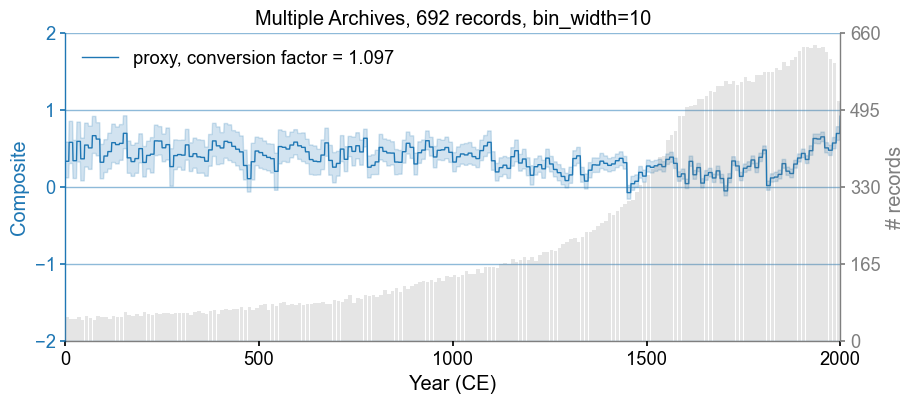

In [12]:
fig, ax = pdb.plot_composite()

In [ ]:

# type_dict = sorted(pdb.type_list.items(), key=lambda item: item[1])
archives = set()
# for k, v in type_dict.items():
for k in pdb.type_list:
    try:
        archives.add(k.split('.')[0])
    except:
        archives.add(k)
   
print(archives)

In [ ]:
url_dict = cfr.utils.climfd_url_dict
url_dict.keys()

In [ ]:
# for k in ['20CRv3/tas', '20CRv3/pr', 'HadCRUTv5', 'HadCRUT4.6_GraphEM']:
for k in ['HadCRUTv5', 'HadCRUT4.6_GraphEM']:
    print(k)
    v = url_dict[k]
    try:
        ds = xr.open_dataset(f'{v}#mode=bytes')
        print('success')
    except:
        print('fail')
        pass

In [3]:
ds = xr.open_dataset('./data/HadCRUT4.6_GraphEM_median.nc')
encoding = {var: {'dtype': 'int32', 'zlib': True, 'complevel': 4, 'shuffle': True, 'fletcher32': True} for var in ds.variables}
ds_new = ds.copy(deep=True)
ds_new.encoding.update(encoding)
ds_new.to_netcdf('./data/test.nc')
ds_new.to_zarr('./data/test.zarr')

In [ ]:
ds = xr.open_dataset('https://github.com/fzhu2e/cfr/raw/main/docsrc/notebooks/data/test.nc#mode=bytes', engine='netcdf4')
ds

In [ ]:
ds = xr.open_dataset('https://github.com/fzhu2e/cfr/raw/main/docsrc/notebooks/data/test.zarr', engine='zarr')

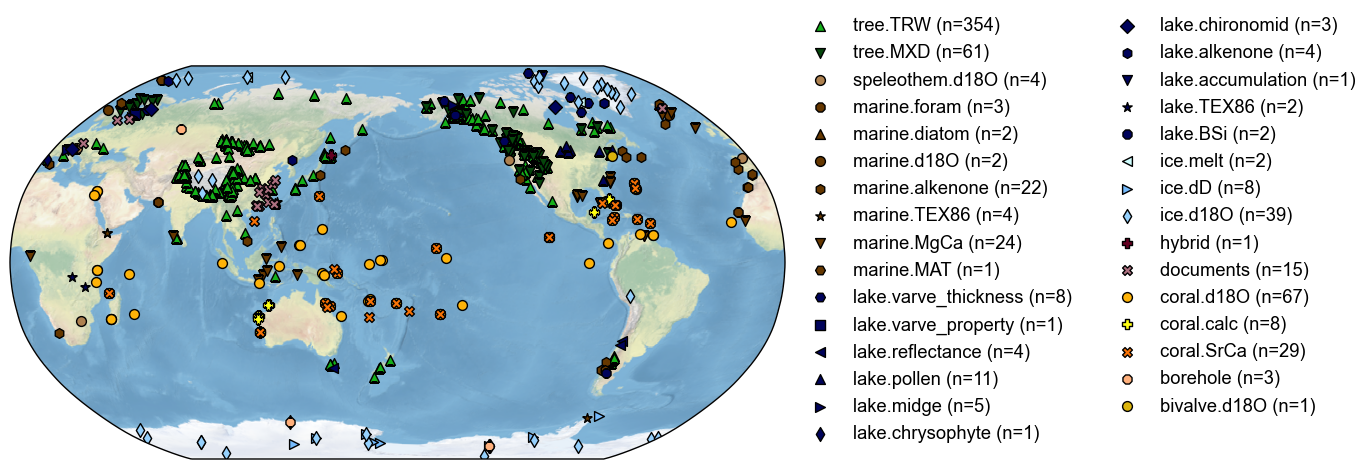

In [3]:
import cfr

job = cfr.ReconJob()
job.load_proxydb('./data/pages2k_updated_Palmyra_dataset.pkl')
fig, ax = job.proxydb.plot()